In [36]:
import pandas as pd
from plotnine import *

In [37]:
df = pd.read_csv('data/전국도시공원표준데이터.csv', encoding='euc-kr')
df.shape

(13135, 18)

In [84]:
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,시도,구군,공원면적그래프용,지역
0,42800-00001,상리공원,어린이공원,강원도 양구군 양구읍 상리 531,강원도 양구군 양구읍 상리 531,38.105771,127.985895,1597.0,033-480-2927,2018-02-28,강원도,양구군,0.1597,양구군강원도
1,42800-00002,정림공원1,어린이공원,강원도 양구군 양구읍 상리 587,강원도 양구군 양구읍 상리 587,38.104065,127.984467,1498.0,033-480-2927,2018-02-28,강원도,양구군,0.1498,양구군강원도
2,42800-00003,정림공원2,어린이공원,강원도 양구군 양구읍 상리 604-6,강원도 양구군 양구읍 상리 604-6,38.104065,127.984467,1499.0,033-480-2927,2018-02-28,강원도,양구군,0.1499,양구군강원도
3,42800-00004,하리수변공원,수변공원,강원도 양구군 양구읍 하리 643,강원도 양구군 양구읍 하리 643,38.118243,127.981634,18437.0,033-480-2460,2018-02-28,강원도,양구군,1.8437,양구군강원도
4,42800-00005,묘지공원,묘지공원,강원도 양구군 양구읍 죽곡리 산3-1,강원도 양구군 양구읍 죽곡리 산3-1,38.125344,127.999027,178931.0,033-480-2576,2018-02-28,강원도,양구군,17.8931,양구군강원도


In [85]:
df['소재지도로명주소'].fillna(df['소재지지번주소'], inplace = True)

/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [86]:
df.isnull().sum()

관리번호           0
공원명            0
공원구분           0
소재지도로명주소       0
소재지지번주소     1204
위도             0
경도             0
공원면적           0
전화번호         624
데이터기준일자        0
시도             0
구군             0
공원면적그래프용       0
지역             0
dtype: int64

In [87]:
df.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', 'Unnamed: 17'], inplace=True)

KeyError: "labels ['공원보유시설(운동시설)' '공원보유시설(유희시설)' '공원보유시설(편익시설)' '공원보유시설(교양시설)'\n '공원보유시설(기타시설)' '지정고시일' '관리기관명' 'Unnamed: 17'] not contained in axis"

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7237 entries, 0 to 13131
Data columns (total 13 columns):
관리번호        7237 non-null object
공원명         7237 non-null object
공원구분        7237 non-null object
소재지도로명주소    7237 non-null object
소재지지번주소     6033 non-null object
위도          7237 non-null float64
경도          7237 non-null float64
공원면적        7237 non-null float64
전화번호        6613 non-null object
데이터기준일자     7237 non-null object
시도          7237 non-null object
구군          7237 non-null object
공원면적그래프용    7237 non-null float64
dtypes: float64(4), object(9)
memory usage: 791.5+ KB


In [60]:
df.describe()

,위도,경도,공원면적,공원면적그래프용
count,7237.000000,7237.000000,7.237000e+03,7237.000000
mean,36.459868,127.566500,4.192931e+04,4.192931
std,1.079510,0.903397,2.230977e+05,22.309774
min,33.303981,126.029652,4.300000e+01,0.004300
25%,35.560569,126.949269,1.524800e+03,0.152480
50%,36.591500,127.122512,2.223000e+03,0.222300
75%,37.444444,128.292592,1.032200e+04,1.032200
max,38.350990,130.905897,5.608490e+06,560.849000


In [61]:
# 시도와 구군 데이터 가져오기
df['시도'] = df['소재지도로명주소'].str.split(' ', expand=True)[0]
df['구군'] = df['소재지도로명주소'].str.split(' ', expand=True)[1]

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
df.shape

(7237, 13)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7237 entries, 0 to 13131
Data columns (total 13 columns):
관리번호        7237 non-null object
공원명         7237 non-null object
공원구분        7237 non-null object
소재지도로명주소    7237 non-null object
소재지지번주소     6033 non-null object
위도          7237 non-null float64
경도          7237 non-null float64
공원면적        7237 non-null float64
전화번호        6613 non-null object
데이터기준일자     7237 non-null object
시도          7237 non-null object
구군          7237 non-null object
공원면적그래프용    7237 non-null float64
dtypes: float64(4), object(9)
memory usage: 791.5+ KB


In [64]:
df.isnull().sum()

관리번호           0
공원명            0
공원구분           0
소재지도로명주소       0
소재지지번주소     1204
위도             0
경도             0
공원면적           0
전화번호         624
데이터기준일자        0
시도             0
구군             0
공원면적그래프용       0
dtype: int64

In [69]:
#df['구군'] = df['구군'].fillna('')
df['시도'] = df['시도'].fillna('')

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
#df['지역'] = df['구군'] + df['시도']

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
df['시도'].shape

(7237,)

In [83]:
df['시도'].unique

<bound method Series.unique of 0          강원도
1          강원도
2          강원도
3          강원도
4          강원도
5          강원도
38       울산광역시
46       울산광역시
47       울산광역시
48       울산광역시
49       울산광역시
50       울산광역시
51       울산광역시
52       울산광역시
53       울산광역시
54       울산광역시
55       울산광역시
56       울산광역시
57       울산광역시
58       울산광역시
59       울산광역시
60       울산광역시
61       울산광역시
62       울산광역시
63       울산광역시
64       울산광역시
65       울산광역시
66       울산광역시
67       울산광역시
68       울산광역시
         ...  
12879     전라남도
12880     전라남도
12884     전라남도
12893    부산광역시
12894    부산광역시
12895    부산광역시
12896    부산광역시
12897    부산광역시
12898    부산광역시
13011     경상남도
13013     경상남도
13014     경상남도
13015     경상남도
13017     경상남도
13018     경상남도
13020     경상남도
13023     경상남도
13029     경상남도
13052     경상남도
13063     경상남도
13112     경상남도
13119     경상남도
13121     경상남도
13122     경상남도
13123     경상남도
13124     경상남도
13125     경상남도
13127     경상남도
13130     경상남도
13131     경상남도
Name: 시도, Length: 7237, dtype: object>

/Users/apple/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Na

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.p

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.p

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.p

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.p

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.p

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.p

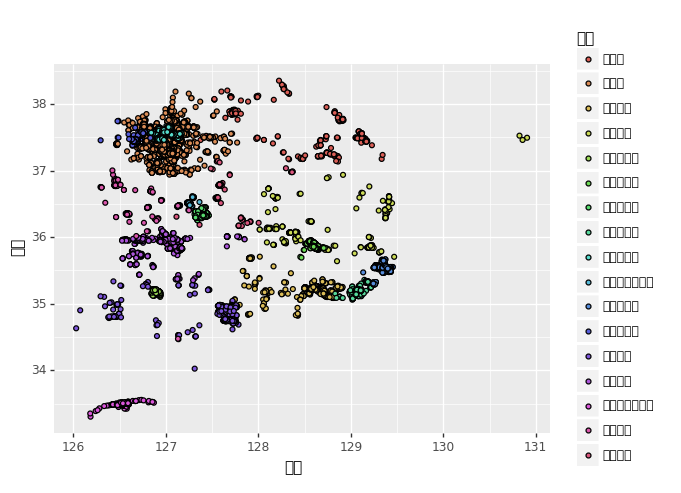

<ggplot: (282842155)>

In [88]:
(ggplot(df)
 + aes(x='경도', y='위도', fill='시도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font f

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.p

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.p

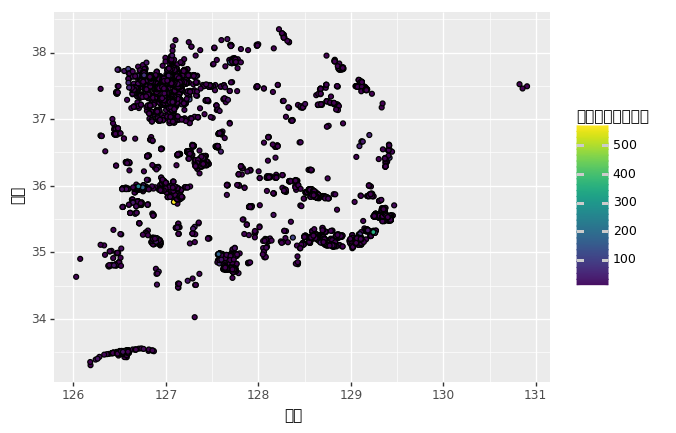

<ggplot: (282992276)>

In [67]:
# 지도를 출력해 보니 특정 지역만 있습니다.
# 결측치인 nan 데이터 때문에 다른 데이터가 제대로 보이지 않습니다.
# nan 데이터를 제거하고 다시 그려봅니다.
(ggplot(df)
 + aes(x='경도', y='위도', fill='공원면적그래프용')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [ ]:
(ggplot(df)
 + aes(x='경도', y='위도', fill='공원구분')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [51]:
# 위 지도로 위도와 경도의 아웃라이어 데이터를 제외하고 출력해 봅니다.
# 좀 더 정확하게 출력하려면 대한민국 위경도 데이터 범위를 다시 넣어줍니다. 
# 그래프 표현시 위경도가 NaN값이면 오류가 나니 제거해 줍니다. 
df = df.loc[(df['위도'] > 32 ) 
            & (df['경도'] < 132) 
            & df['시도'].notnull()]
df.shape

(7237, 13)

In [54]:
# 특정지역의 일부 공원만 보기
park_type = r'.*((역사|체육|수변|문화|묘지)공원).*'
gg_sample = gg.loc[gg['공원구분'].str.match(park_type)]

NameError: name 'gg' is not defined